## Importiere `pandas`, `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import json
from datetime import datetime as dt
import locale
from scipy.interpolate import interp1d
from configparser import ConfigParser
from functions import *

## Lade die Konfigurationen aus `config.ini`
#### Definiere die Umgebung

In [2]:
config = ConfigParser()
files = config.read('config.ini')

# Wechsel des plt.style per config.ini machbar.
plt.style.use(config.get('theme', 'plt.style'))

# Damit Daten mit den deutschen Begriffen für die Monat generiert werden.
locale = locale.setlocale(locale.LC_TIME, "de_DE")

In [3]:
env = 'final'
database_file = config.get(env, 'database_file')
date_begin = config.get(env, 'date_begin')
date_end = config.get(env, 'date_end')
dpi = config.get(env, 'dpi')

target = ["covid", "inflation"]

In [4]:
df = pd.read_json(database_file)

#### Filter die Artikel nach: Sind zwischen dem und dem Datum veröffentlich worden.

In [5]:
df = df.loc[(df['date'] >= date_begin) & (df['date'] <= date_end)]

#### Füge ein neues Feature hinzu: Anzahl Wörter, Anzahl Zeichen

In [6]:
df['content_length'] = df['content'].str.len()
df['content_words'] = df['content'].str.split().map(len)

#### Ändere die Spalte `ressort` zu einem Anfangsgroßbuchstaben

In [7]:
df.ressort = df.ressort.str.title()

#### Ändere das Ressort der Artikel ohne Zuordnung zu `(Kein Ressort)`

In [8]:
df.ressort = df.ressort.replace(r'\s+|^$', "(Kein Ressort)", regex=True)

## Gruppiere die Artikel nach: Ressort 
#### Aggregiere pro Ressort die Durchschnittsanzahl Zeichen/Wörter

In [9]:
df = df.groupby(['ressort']).agg({"content_length": "mean", "content_words": "mean"})

#### Sortiere die Artikel nach: Anzahl Zeichen (absteigend)

In [10]:
df = df.sort_values("content_length", ascending=False)

In [11]:
df

,content_length,content_words
ressort,,
Investigativ,5920.722892,804.969880
Wissen,5232.118519,743.992593
Wirtschaft,3794.203956,525.461681
Inland,3444.339445,473.681368
Ausland,3214.269116,448.965905
Sport,2906.252252,426.468468
(Kein Ressort),2558.123563,353.886494


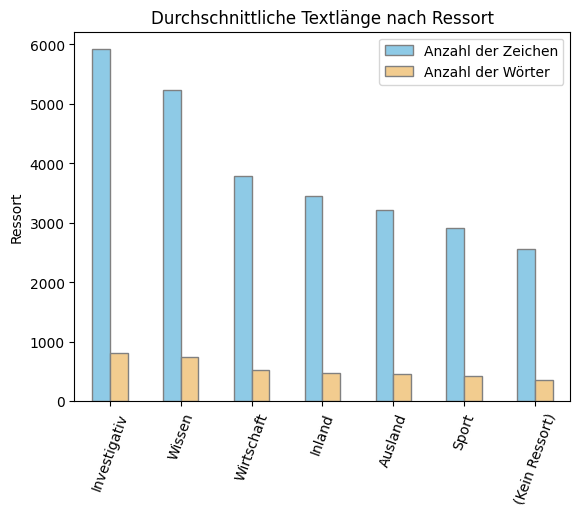

In [12]:
ax = df.plot(kind="bar", y=['content_length', 'content_words'], xlabel="Anzahl der Artikel", ylabel="Ressort", color=["#8ecae6", "#f2cc8f"], edgecolor=["grey"], rot=70)

ax.set_title('Durchschnittliche Textlänge nach Ressort')
ax.legend(["Anzahl der Zeichen", "Anzahl der Wörter"])
ax.xaxis.label.set_visible(False)

ax.get_figure().savefig('figures/bar-length-ressort.png', bbox_inches="tight", dpi=float(dpi))

## Boxplot

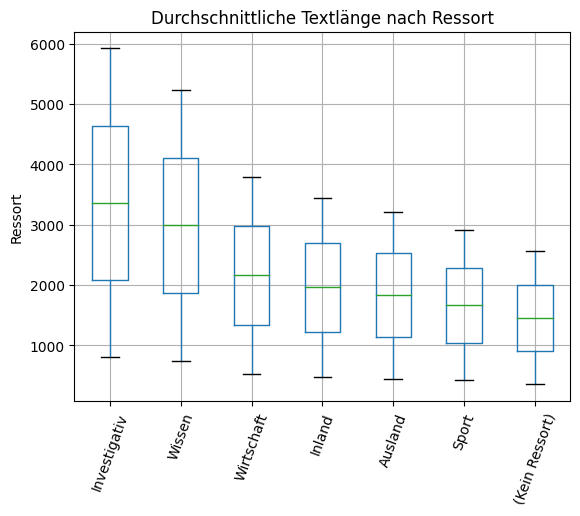

In [13]:
ax = df.T.boxplot(xlabel="Anzahl der Artikel", ylabel="Ressort", rot=70)

ax.set_title('Durchschnittliche Textlänge nach Ressort')
#ax.legend(["Anzahl der Zeichen", "Anzahl der Wörter"])
ax.xaxis.label.set_visible(False)

ax.get_figure().savefig('figures/box-length-ressort.png', bbox_inches="tight", dpi=float(dpi))